In [4]:
'''Importing libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Project/python_report/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Project/python_report


#Estimating Keynesian consumption functions

##(a) Importing Data

In [5]:
'''Importing excel to a dataframe'''
df=pd.read_excel('1612876736-USdata.xls')
df.loc[10:12,:]

,FRED Graph Observations,Unnamed: 1,Unnamed: 2,Unnamed: 3
10,Frequency: Quarterly,NaN,NaN,NaN
11,observation_date,PCEC,GDP,IRLTLT01USQ156N
12,1960-01-01 00:00:00,326.364,542.648,4.48667


In [6]:
data=df.loc[12:,:].copy()
data.columns=['observation_date','PCEC','GDP','IRLTLT01USQ156N']
data=data.reset_index(drop=True)
for i in range(len(data)):
  data.loc[i,'observation_date']=data.loc[i,'observation_date'].date()

In [7]:
'''Final dataframe to be used'''
data

,observation_date,PCEC,GDP,IRLTLT01USQ156N
0,1960-01-01,326.364,542.648,4.48667
1,1960-04-01,332.208,541.08,4.26
2,1960-07-01,332.126,545.604,3.83333
3,1960-10-01,334.024,540.197,3.88667
4,1961-01-01,334.52,545.018,3.78667
...,...,...,...,...
234,2018-07-01,14114.6,20749.8,2.92667
235,2018-10-01,14211.9,20897.8,3.03333
236,2019-01-01,14266.2,21098.8,2.65333
237,2019-04-01,14511.2,21340.3,2.33333


##(b) Visualizing the plots

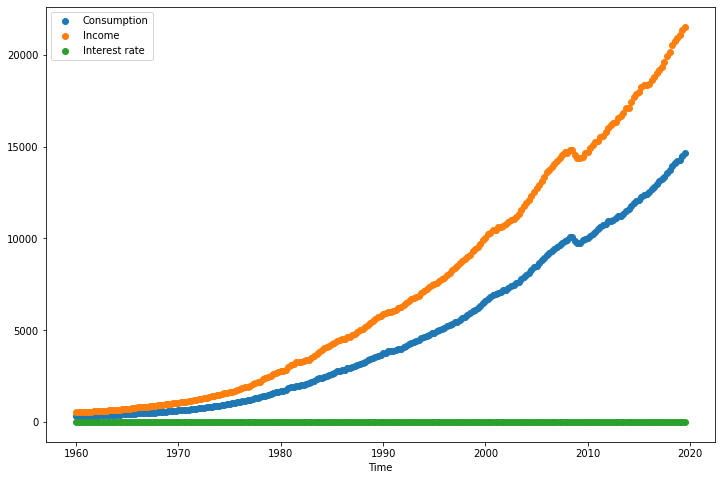

In [ ]:
'''Graph of Consumption, Income and Interest Rate VS Time'''
plt.figure(figsize=[12,8])
plt.scatter(x=data['observation_date'],y=data['PCEC'])
plt.scatter(x=data['observation_date'],y=data['GDP'])
plt.scatter(x=data['observation_date'],y=data['IRLTLT01USQ156N'])
plt.legend(['Consumption','Income','Interest rate'])
plt.xlabel('Time')
plt.show()

We can see that the income is growing at a faster pace than the the consumption and interest rates. This means that the savings which is income minus the consumption is always positive and increasing at a faster pace. This literally means that people are saving more than earlier. This can be just due to the dramatic increase in the household income levels. Initially since people were earning minimal amount, then expenditure would be on neccesary items and hence they wouldn't save much. but as the aggregated income increases, people can save more as the neccesity items are taken care of. Also we can see that the interest rates don't fluctuate so much as compares to consupmtion and income.

##(c) OLS (point) estimates

In [9]:
C=data['PCEC'].to_numpy().reshape([-1,1])
Y=data['GDP'].to_numpy().reshape([-1,1])
r=data['IRLTLT01USQ156N'].to_numpy().reshape([-1,1])
C=C.astype('float')
Y=Y.astype('float')
r=r.astype('float')
print('Shape of C:',C.shape)
print('Shape of Y:',Y.shape)
print('Shape of r:',r.shape)

Shape of C: (239, 1)
Shape of Y: (239, 1)
Shape of r: (239, 1)


###model1

$C_t = {\alpha}_0 + {\alpha}_1 Y_t + {\epsilon}_t$

####builtin model

In [13]:
a=np.ones(Y.shape)
Y_cons=np.concatenate([a,Y],axis=1)
model = sm.OLS(endog=C, exog=Y_cons)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('\n**********************\n',results.summary())

Parameters:  [-167.1292038     0.68487276]
R2:  0.9995599947475181

**********************
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.384e+05
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:16:00   Log-Likelihood:                -1412.1
No. Observations:                 239   AIC:                             2828.
Df Residuals:                     237   BIC:                             2835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

####using matrix operations

In [14]:
def r_val(Y,C):
  n=len(C)
  s_C=np.std(C)
  s_Y=np.std(Y)
  m_C=np.mean(C)
  m_Y=np.mean(Y)
  z_C=(C-m_C)/s_C
  z_Y=(Y-m_Y)/s_Y
  denominator=(n*np.sum(C**2)-np.sum(C)**2)*(n*np.sum(Y**2)-np.sum(Y)**2)
  r_YC=((n*np.sum(C*Y))-(np.sum(C)*np.sum(Y)))/np.sqrt(denominator)
  return r_YC

In [15]:
r_YC=r_val(Y,C)
r_2=r_YC**2

m_C=np.mean(C)
m_Y_cons=np.mean(Y_cons,axis=0).reshape([1,-1])

alpha=(np.linalg.pinv(Y_cons)).dot(C)
e_1=m_C-alpha.T.dot(m_Y_cons.T)

print('parameters:')
print(alpha)
print('\nepsilon',e_1)
print('\nR^2',r_2)

parameters:
[[-167.1292038 ]
 [   0.68487276]]

epsilon [[9.09494702e-13]]

R^2 0.9995599947475194


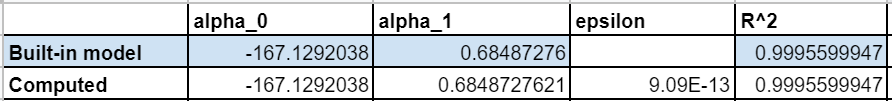

###model2

$C_t = {\beta}_0 + {\beta}_1 Y_t + {\beta}_2 r_t + {\epsilon}_t$

####builtin model

In [16]:
Ynew=np.concatenate([Y_cons,r],axis=1)
model = sm.OLS(endog=C, exog=Ynew)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('\n**********************\n',results.summary())

Parameters:  [ 36.64663      0.67807397 -25.29811167]
R2:  0.9997515852222332

**********************
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.749e+05
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:18:08   Log-Likelihood:                -1343.8
No. Observations:                 239   AIC:                             2694.
Df Residuals:                     236   BIC:                             2704.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

####using matrix operations

In [17]:
r_YC=r_val(Y,C)
r_rC=r_val(r,C)
r_rY=r_val(r,Y)
r_2=(r_YC**2+r_rC**2-2*r_rC*r_rY*r_YC)/(1-r_rY**2)

m_C=np.mean(C)
m_Ynew=np.mean(Ynew,axis=0).reshape([1,-1])

beta=(np.linalg.pinv(Ynew)).dot(C)
e_2=m_C-(beta.T.dot(m_Ynew.T))
print('parameters:')
print(beta)
print('\nepsilon',e_2)
print('\nR^2',r_2)

parameters:
[[ 36.64663   ]
 [  0.67807397]
 [-25.29811167]]

epsilon [[4.54747351e-12]]

R^2 0.9997515852222344


R^2 is a statistical measure, of how close the dependent variables are to the fitted regression line. With the inclusion of interest rate to the regression the model tends to better fit with higher value of R^2. With more the independent variables given to a model, the models horizon expands and gets better prediction results

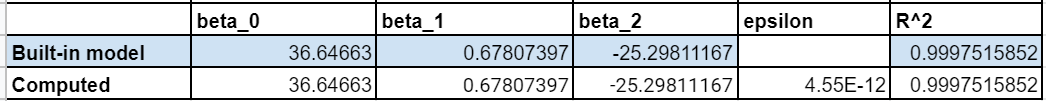

##(d) Logarithmic scale

###visualizing the plots

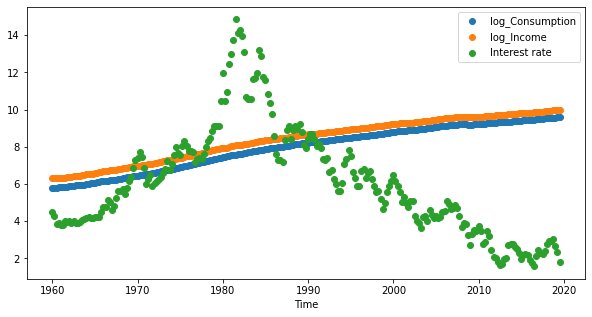

In [18]:
'''The scale for each variable becomes comparable and provides better prediction'''
plt.figure(figsize=[10,5])
C=np.log(C)
Y=np.log(Y)
plt.scatter(x=data['observation_date'],y=C)
plt.scatter(x=data['observation_date'],y=Y)
plt.scatter(x=data['observation_date'],y=data['IRLTLT01USQ156N'])
plt.legend(['log_Consumption','log_Income','Interest rate'])
plt.xlabel('Time')
plt.show()

###model1

####builtin model

In [20]:
a=np.ones(Y.shape)
Y_cons=np.concatenate([a,Y],axis=1)
model = sm.OLS(endog=C, exog=Y_cons)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('\n**********************\n',results.summary())

Parameters:  [-0.80123314  1.04156051]
R2:  0.9998152870217674

**********************
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+06
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:20:41   Log-Likelihood:                 647.80
No. Observations:                 239   AIC:                            -1292.
Df Residuals:                     237   BIC:                            -1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

####experimental

In [21]:
r_YC=r_val(Y,C)
r_2=r_YC**2

m_C=np.mean(C)
m_Y_cons=np.mean(Y_cons,axis=0).reshape([1,-1])

alpha=(np.linalg.pinv(Y_cons)).dot(C)
e_1=m_C-alpha.T.dot(m_Y_cons.T)

print('parameters:')
print(alpha)
print('\nepsilon',e_1)
print('\nR^2',r_2)

parameters:
[[-0.80123314]
 [ 1.04156051]]

epsilon [[-7.10542736e-15]]

R^2 0.9998152870217585


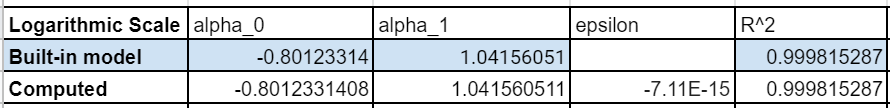

###model2

####builtin model

In [22]:
Ynew=np.concatenate([Y_cons,r],axis=1)
model = sm.OLS(endog=C, exog=Ynew)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('\n**********************\n',results.summary())

Parameters:  [-0.74820152  1.03836423 -0.00431522]
R2:  0.9999144443844316

**********************
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.379e+06
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:21:04   Log-Likelihood:                 739.78
No. Observations:                 239   AIC:                            -1474.
Df Residuals:                     236   BIC:                            -1463.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

####experimental

In [23]:
r_YC=r_val(Y,C)
r_rC=r_val(r,C)
r_rY=r_val(r,Y)
r_2=(r_YC**2+r_rC**2-2*r_rC*r_rY*r_YC)/(1-r_rY**2)

m_C=np.mean(C)
m_Ynew=np.mean(Ynew,axis=0).reshape([1,-1])

beta=(np.linalg.pinv(Ynew)).dot(C)
e_2=m_C-(beta.T.dot(m_Ynew.T))
print('parameters:')
print(beta)
print('\nepsilon',e_2)
print('\nR^2',r_2)

parameters:
[[-0.74820152]
 [ 1.03836423]
 [-0.00431522]]

epsilon [[-2.13162821e-14]]

R^2 0.9999144443844228


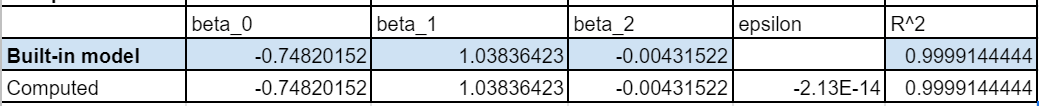

By converting the consumption and income values to logarithmic scale the regression the model tends to fit better with higher value of R^2 

This is because, as we convert variables to logarithmic scale we decrease the range of variables and get everything under one scale which provides better prediction rather than a model inclined towards the greater values variables

# IS-LM-FE Model

In [24]:
c = 0.63
k = 0.6
h = 2700
b = 1500 #sensitivity of investment to the interest rate
C_bar = 55 #autonomous consumption 
I_bar = 75 #autonomous investment 
G_bar = 200 #government spending
T_bar = 110 #tax on income 
M_bar = 200 #money supply 
P_bar = 1 #price level

In [25]:
def func(c,b,k,h,C_bar,I_bar,G_bar,T_bar,M_bar,P_bar):
  A = np.matrix([ [1, -1, -1, 0],[-c, 1, 0, 0],[0, 0, 1, b],[k, 0, 0, -h] ])
  d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
  x = (np.linalg.inv(A)).dot(d)
  Y=x[0,0] #GDP
  C=x[0,1] #Consumption
  I=x[0,2] #Investment
  r=x[0,3] #Interest rate
  print('GDP',Y)
  print('Consumption',C)
  print('Investment',I)
  print('Interest Rate',r)
  return Y,C,I,r

##(a) studying effect of sensitivity of investment to interest rate

In [26]:
#case 0:
"""This is the case where the sensitivity to interest rate is at the benchmark"""
b = 1500
Y_0,C_0,I_0,r_0=func(c,b,k,h,C_bar,I_bar,G_bar,T_bar,M_bar,P_bar)

GDP 528.6413902053712
Consumption 318.74407582938386
Investment 9.897314375987364
Interest Rate 0.04340179041600842


In [27]:
#case 1: 
"""This is the case where the sensitivity to interest rate is low"""
bL = 1000
Y_1,C_1,I_1,r_1=func(c,bL,k,h,C_bar,I_bar,G_bar,T_bar,M_bar,P_bar)

GDP 565.2845528455284
Consumption 341.8292682926829
Investment 23.455284552845526
Interest Rate 0.051544715447154485


In [28]:
#case 2:
"""This is the case where the sensitivity to interest rate is high"""
bH = 2000
Y_2,C_2,I_2,r_2=func(c,bH,k,h,C_bar,I_bar,G_bar,T_bar,M_bar,P_bar)

GDP 501.9963619827194
Consumption 301.9577080491132
Investment 0.03865393360619862
Interest Rate 0.03748067303319691


In [29]:
# This code prints the table format for the 
table_3a=pd.DataFrame(np.zeros([4,3]),index=['GDP','Consumption',
                                             'Investment','Interest Rate'],
                      columns=['b=1500','bL=1000','bH=2000'])
table_3a.iloc[0,0]=Y_0
table_3a.iloc[1,0]=C_0
table_3a.iloc[2,0]=I_0
table_3a.iloc[3,0]=r_0
table_3a.iloc[0,1]=Y_1
table_3a.iloc[1,1]=C_1
table_3a.iloc[2,1]=I_1
table_3a.iloc[3,1]=r_1
table_3a.iloc[0,2]=Y_2
table_3a.iloc[1,2]=C_2
table_3a.iloc[2,2]=I_2
table_3a.iloc[3,2]=r_2
table_3a

,b=1500,bL=1000,bH=2000
GDP,528.641390,565.284553,501.996362
Consumption,318.744076,341.829268,301.957708
Investment,9.897314,23.455285,0.038654
Interest Rate,0.043402,0.051545,0.037481


With the increase in sensitivity of investment to the interest rate, Consumption, Investment and the interest rate decreases. However the GDP follows a bell shaped curve with the values decreasing on both ends.

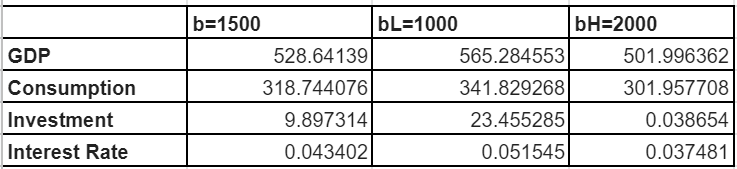

---
Compared to the benchmark case with b = 1500, what 
economic channels do you think are causing the changes in the aggregate outcomes? 

Do you think that the responses of the aggregate variables predicted by the model are reasonable? Why or why not?

---

When the sensitivity of the investment to the interest rate is low this means that the interest rates are not very likely to drastically change within a short period of time. This means that people have more confidence in investing into the economy. So this results in more aggregated spending of people because they feel that it is not going to affect their investment in a drastic way. So this causes the investment to shoot up rapidly and then as a result of this the GDP also increases. The consupmtion is same as spending and this too increases in the low interest rate sensitivity scenario. But when the interest rates sensitivity is high this means that the when money is spent on an asset, the change in interest rates is very drastic. This means that there is a chance that the good investment today would likely be considered a bad investment in the future if the interest rates are very high. So people spend lesser than usual and due to this the aggregated consumption decreases. In this way the GDP also decreases and the investment decreases rapidly. The responses of the aggregated variables predicted by the model are quite reasonable. The investment drop seems too drastic between bL and bH. Other that this the table predicttions by the model is consistent with the economic theory.

##(b) analyzing the role of fiscal & monetary policies.

As we all know that the fiscal austerity policy and monetary policies have a detrimental impact on the economy, it is very important to study the ans analyze their role for low sensitivity to inrest rates.

In [30]:
#case 0 default
bL = 1000
Y_1,C_1,I_1,r_1=func(c,bL,k,h,C_bar,I_bar,G_bar,T_bar,M_bar,P_bar)

GDP 565.2845528455284
Consumption 341.8292682926829
Investment 23.455284552845526
Interest Rate 0.051544715447154485


In [31]:
#case 1 fiscal austerity policy
bL = 1000
G_bar_new=180
Y_a,C_a,I_a,r_a=func(c,bL,k,h,C_bar,I_bar,G_bar_new,T_bar,M_bar,P_bar)

GDP 531.5134459036898
Consumption 320.5534709193246
Investment 30.959974984365232
Interest Rate 0.04404002501563478


It is fairly intutive to see that is the fiscal policy results in lesser govenment spending then the GDP will decrease. This is also consistent with the IS-LM-FE model. Because the government spending boosts any economy and its GDP. So if the government spending decreases then the GDP decreases along with the consumption. Due to this the interest rates drop and more people tend to invest more than consumption. This results in the increased investment.

In [32]:
#case 2 monetary policy
bL = 1000
M_bar_new=180
Y_b,C_b,I_b,r_b=func(c,bL,k,h,C_bar,I_bar,G_bar,T_bar,M_bar_new,P_bar)

GDP 552.7767354596623
Consumption 333.94934333958724
Investment 18.827392120075046
Interest Rate 0.056172607879924966


When the monetart policy restricts the money supply in the economy then we clearly see a drop in the GDP of the nation. Because the money supply in the market determines how much of consumption is possible. We can think of it intutively as if we wanted to buy a good but there is shortage of money supply and due to this we tend to defer our consumption and hence the consumption decreases. Also since there is shortage of money in the market, the investments also would decrease. Due to the scarcity of money, lending money becomes more demandin than before. This heavily affects the interest rates of the economy. So the interest rates rises.

In [33]:
#case 3 fiscal austerity and monetary policy
bL = 1000
M_bar_new=180
G_bar_new=180
Y_c,C_c,I_c,r_c=func(c,bL,k,h,C_bar,I_bar,G_bar_new,T_bar,M_bar_new,P_bar)

GDP 519.0056285178237
Consumption 312.6735459662289
Investment 26.332082551594752
Interest Rate 0.04866791744840526


This is just to see what happens if both the monetary and fiscal policies are considered into action. We see that with decreasing government spending and decreased money supply in the market, the GDP decreases rapidly. The consumption also decreases and investments are low. The interest rates drop but are more than case 2.

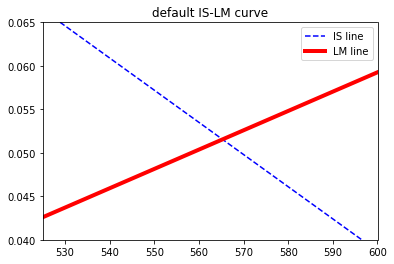

In [34]:
Y = np.linspace(0.65*Y_1,1.1*Y_1, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar / P_bar )

plt.title('default IS-LM curve')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((525, 600))
plt.ylim((0.04, 0.065))
plt.legend()
plt.show()

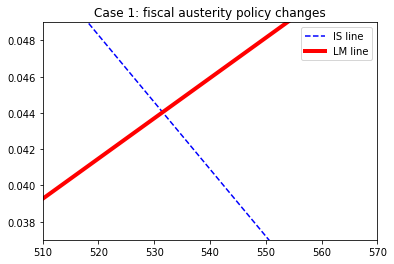

In [35]:
Y = np.linspace(0.65*Y_c,1.1*Y_c, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar_new
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar / P_bar )

plt.title('Case 1: fiscal austerity policy changes')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((510, 570))
plt.ylim((0.037, 0.049))
plt.legend()
plt.show()

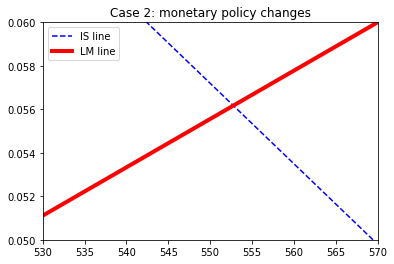

In [36]:
Y = np.linspace(0.65*Y_c,1.1*Y_c, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar_new / P_bar )

plt.title('Case 2: monetary policy changes')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((530, 570))
plt.ylim((0.05, 0.06))
plt.legend()
plt.show()

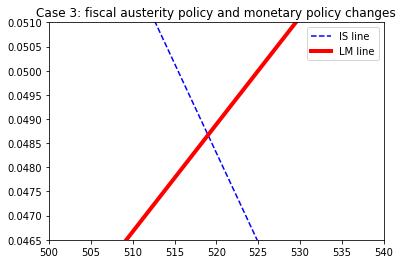

In [37]:
Y = np.linspace(0.65*Y_c,1.1*Y_c, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar_new
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar_new / P_bar )

plt.title('Case 3: fiscal austerity policy and monetary policy changes')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((500, 540))
plt.ylim((0.0465, 0.051))
plt.legend()
plt.show()

In [40]:
table_3b=pd.DataFrame(np.zeros([4,4]),index=['GDP','Consumption',
                                             'Investment','Interest Rate'],
                      columns=['bL=1000','fiscal austerity & monetary policy',
                               'monetary policy','fiscal austerity policy'])
table_3b.iloc[0,0]=Y_1
table_3b.iloc[1,0]=C_1
table_3b.iloc[2,0]=I_1
table_3b.iloc[3,0]=r_1
table_3b.iloc[0,1]=Y_c
table_3b.iloc[1,1]=C_c
table_3b.iloc[2,1]=I_c
table_3b.iloc[3,1]=r_c
table_3b.iloc[0,2]=Y_b
table_3b.iloc[1,2]=C_b
table_3b.iloc[2,2]=I_b
table_3b.iloc[3,2]=r_b
table_3b.iloc[0,3]=Y_a
table_3b.iloc[1,3]=C_a
table_3b.iloc[2,3]=I_a
table_3b.iloc[3,3]=r_a
table_3b

,bL=1000,fiscal austerity & monetary policy,monetary policy,fiscal austerity policy
GDP,565.284553,519.005629,552.776735,531.513446
Consumption,341.829268,312.673546,333.949343,320.553471
Investment,23.455285,26.332083,18.827392,30.959975
Interest Rate,0.051545,0.048668,0.056173,0.044040


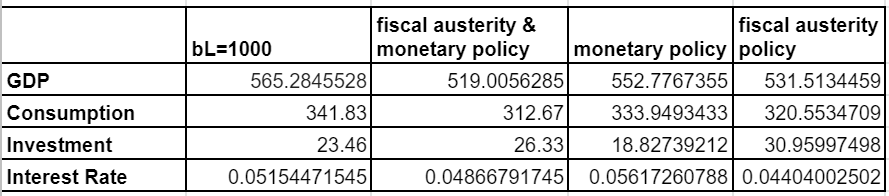

With the inclusion of fiscal austerity & monetary policy, there is a decrease in GDP, Consumption, and the interest rate. Whereas, the investments tend to increase a little. In Case A, (fiscal austerity policy) there is drastic drop in the investments whereas a rise in the interest rate. In Case B, (monetary policy) there is increment in the investments with the decrease in the interest rates. However, in both the cases there is a generic fall in GDP and Consumption.

Below are the graphs for both the Case A and Case B, individually.


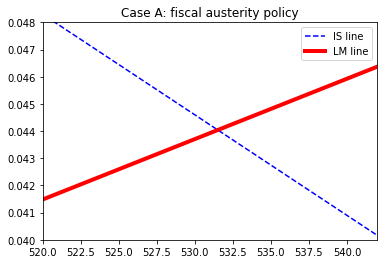

In [41]:
Y = np.linspace(0.65*Y_a,1.1*Y_a, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar_new
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar / P_bar )

plt.title('Case A: fiscal austerity policy')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((520, 542))
plt.ylim((0.04, 0.048))
plt.legend()
plt.show()

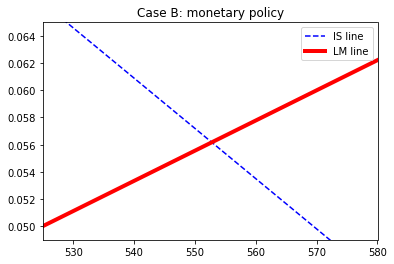

In [42]:
Y = np.linspace(0.65*Y_b,1.1*Y_b, num=100) 
C = C_bar + c*(Y - T_bar) 
I = Y - C - G_bar
IS = ( I_bar - I ) / bL
LM = (1/h)*( k*Y - M_bar_new / P_bar )

plt.title('Case B: monetary policy')
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((525, 580))
plt.ylim((0.049, 0.065))
plt.legend()
plt.show()